In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from scipy.special import expit

2024-08-07 16:09:58.300437: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:09:58.303691: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:09:58.311788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 16:09:58.324079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 16:09:58.327642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 16:09:58.339105: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Loads mnist data into variables

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Pixel values by default are [0,255] (where 0 is black and 255 is white)
# We normalize these values for better compatibility with my model
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

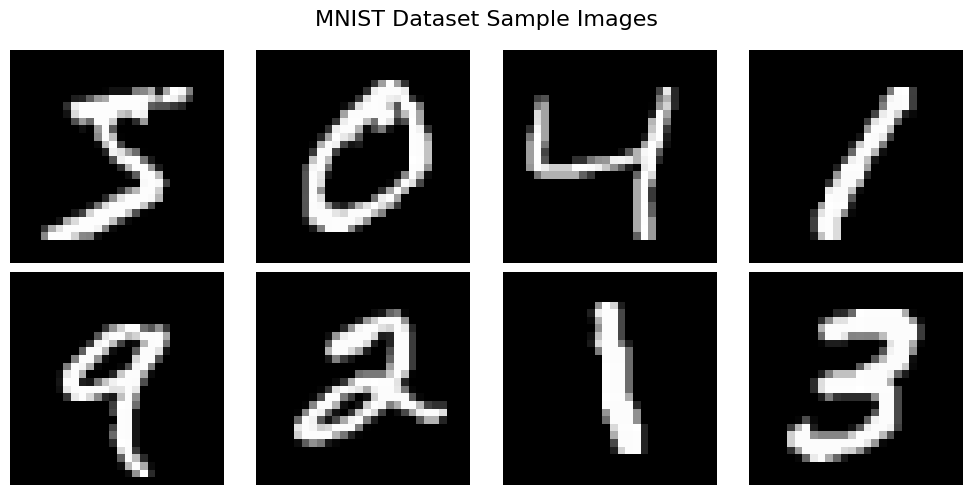

In [6]:
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(10, 5))

# Commented code shows first 8 images (indices 0-7)

for i in range(rows):
    for j in range(cols):
        index = j + (cols * i)
        axes[i, j].imshow(train_images[index], cmap='gray')
        axes[i, j].axis('off')


# # Show 8 random images in the dataset

# for i in range(rows):
#     for j in range(cols):
#         index = np.random.randint(0, train_images.shape[0] - 1)
#         axes[i, j].imshow(train_images[index], cmap='gray')
#         axes[i, j].axis('off')

fig.suptitle("MNIST Dataset Sample Images", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
n1Size = 784
n2Size = 16
n3Size = 16
n4Size = 10

l1Weights = np.array([])

for i in range(n1Size):
    temp = np.array([])
    for j in range(n2Size):
        # temp is an array of weights from ith neuron to all 16 neurons in the second layer
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l1Weights.size == 0:
        l1Weights = np.array([temp])
    else:
        l1Weights = np.append(l1Weights, [temp], axis=0)  
l2Weights = np.array([])

for i in range(n2Size):
    temp = np.array([])
    for j in range(n3Size):
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l2Weights.size == 0:
        l2Weights = np.array([temp])
    else:
        l2Weights = np.append(l2Weights, [temp], axis=0)     

l3Weights = np.array([])

for i in range(n3Size):
    temp = np.array([])
    for j in range(n4Size):
        temp = np.append(temp, np.random.normal(loc=0, scale=1))
    if l3Weights.size == 0:
        l3Weights = np.array([temp])
    else:
        l3Weights = np.append(l3Weights, [temp], axis=0)  


l2Biases = np.array([])
l3Biases = np.array([])
l4Biases = np.array([])

for i in range(16):
    l2Biases = np.append(l2Biases, np.random.normal(loc=0, scale=1))
    l3Biases = np.append(l3Biases, np.random.normal(loc=0, scale=1))
    if i < 10:
        l4Biases = np.append(l4Biases, np.random.normal(loc=0, scale=1))

In [16]:
# We are using the sigmoid function as our activation function
def sigmoid_prime(x):
    
    return expit(x) * (1.0 - expit(x))
    

class Network:
    def __init__(self):
        # a1-a4 are the activiations of every neuron
        # z2-z4 are the pre-activation function values of each neuron while it's being run through the network
        # bestloss records the lowest loss value from batch to batch. It's set to 100.0 to be an unreasonably high number
        self.bestloss = 100.0
        
        self.a1 = np.zeros(784)
        self.a2 = np.zeros(16)
        self.a3 = np.zeros(16)
        self.a4 = np.zeros(10)

        self.z2 = np.zeros(16)
        self.z3 = np.zeros(16)
        self.z4 = np.zeros(10)
    
    def setWeights(self, w1, w2, w3):
        self.w1 = np.copy(w1)
        self.w2 = np.copy(w2)
        self.w3 = np.copy(w3)
        
    def setBiases(self, b2, b3, b4):
        self.b2 = np.copy(b2)
        self.b3 = np.copy(b3)
        self.b4 = np.copy(b4)
        
    
    # loads an image into the 1st layer
    def initImage(self, data, index):
        self.a1 = data[index].flatten()

    # Runs through the network with an image
    def runImage(self):

        self.z2 = np.dot(self.a1, self.w1) + self.b2
        self.a2 = expit(self.z2)

        self.z3 = np.dot(self.a2, self.w2) + self.b3
        self.a3 = expit(self.z3)
        
        self.z4 = np.dot(self.a3, self.w3) + self.b4
        self.a4 = expit(self.z4)

    # Calculates the loss of the current image
    def calcLoss(self):
        return np.linalg.norm(self.a4 - self.target_vector) ** 2.0
    
    # Returns a bool (T or F) if the network succesfully classified an image
    def isCorrect(self):
        return np.where(self.target_vector == 1)[0] == np.argmax(self.a4)
            
    
    # Backprop
    
    # Does stochastic gradient descent and calculates the amount the weights from l3-l4 and biases in l4 need to shift to better classify the image next time
    def backProp_n4(self):
        y = 0
        self.w3_mod_cur = np.zeros((16, 10))

        
        for i in range(self.a3.size):
            for j in range(self.a4.size):

                if np.where(self.target_vector == 1)[0] == j:
                    y = 1
                else:
                    y = 0

                
                if (i == 0): # calculate biases
                    self.b4_mod[j] += sigmoid_prime(self.z4[j]) * 2.0 * (self.a4[j] - y)
                
                self.w3_mod_cur[i][j] = self.a3[i] * sigmoid_prime(self.z4[j]) * 2.0 * (self.a4[j] - y) # used for later calculations
                self.w3_mod[i][j] += self.w3_mod_cur[i][j]
                
    
    def backProp_n3(self):
        self.w2_mod_cur = np.zeros((16, 16))
        
        temp_w3 = self.w3_mod_cur / self.a3[:, np.newaxis] # divide by a
        temp_w3 *= self.w3 # multiply by w
        # now temp_w3 is a matrix of del C / del a
        
        for i in range(self.a2.size):
            for j in range(self.a3.size):
                
                temp = self.a2[i] * sigmoid_prime(self.z3[j])

                temp2 = np.sum(temp_w3[j])

                if i == 0: # calculate biases
                    self.b3_mod[j] += sigmoid_prime(self.z3[j]) * temp2 # using w3 here (shhh!)

                self.w2_mod_cur[i][j] = temp * temp2
                self.w2_mod[i][j] += self.w2_mod_cur[i][j]

                

        
    
    def backProp_n2(self):
        temp_w2 = self.w2_mod_cur / self.a2[:, np.newaxis] # divide by a
        temp_w2 *= self.w2 # multiply by w
        # now temp_w2 is a matrix of del C / del a
        
        for i in range(self.a1.size):
            for j in range(self.a2.size):
                
                temp = self.a1[i] * sigmoid_prime(self.z2[j])

                temp2 = np.sum(temp_w2[j])

                if i == 0: # calculate biases
                    self.b2_mod[j] += sigmoid_prime(self.z2[j]) * temp2 # using w3 here (shhh!)
                    
                self.w1_mod[i][j] += temp * temp2


                    
    
    def backProp(self):
        self.backProp_n4()
        self.backProp_n3()
        self.backProp_n2()
    
    # Runs 1 batch (default batchsize == 100)
    def runBatch(self, data, labels, startIdx = 0, batchSize=100, test=False):

        
        self.w3_mod = np.copy(self.w3)
        self.w3_mod.fill(0.0)
        
        self.b4_mod = np.copy(self.b4)
        self.b4_mod.fill(0.0)
        
        self.w2_mod = np.copy(self.w2)
        self.w2_mod.fill(0.0)
        
        self.b3_mod = np.copy(self.b3)
        self.b3_mod.fill(0.0)
        
        self.w1_mod = np.copy(self.w1)
        self.w1_mod.fill(0.0)
        
        self.b2_mod = np.copy(self.b2)
        self.b2_mod.fill(0.0)

        self.target_vector = np.zeros(10)

        
        loss = 0.0
        counter = 0
        for i in range(startIdx, startIdx + batchSize):
            self.target_vector[labels[i]] = 1
            
            
            
            if i % 100 == 0:
                print(i)
            
            self.initImage(data, i)
            self.runImage()
            loss += self.calcLoss()
            if self.isCorrect():
                counter += 1
            self.backProp()

            self.target_vector[labels[i]] = 0


        if not test:
            loss /= batchSize
        else: # if test
            print("TESTING TIMEEEEEEEEEE!")
            loss /= batchSize
        print(loss)
        
        if loss < self.bestloss and not test:
            self.bestloss = loss
            self.best_w3 = self.w3
            self.best_w2 = self.w2
            self.best_w2 = self.w2

            self.best_b4 = self.b4
            self.best_b3 = self.b3
            self.best_b2 = self.b2

        
        print(counter / batchSize)
        
        
        
        self.w3_mod = np.divide(self.w3_mod, float(batchSize))
        self.w2_mod = np.divide(self.w2_mod, float(batchSize))
        self.w1_mod = np.divide(self.w1_mod, float(batchSize))
        self.b4_mod = np.divide(self.b4_mod, float(batchSize))
        self.b3_mod = np.divide(self.b3_mod, float(batchSize))
        self.b2_mod = np.divide(self.b2_mod, float(batchSize))
        
        
        learningRate = 3.0
        
        
        if not test:
            self.w3 -= learningRate * self.w3_mod
            self.w2 -= learningRate * self.w2_mod
            self.w1 -= learningRate * self.w1_mod
            self.b4 -= learningRate * self.b4_mod
            self.b3 -= learningRate * self.b3_mod
            self.b2 -= learningRate * self.b2_mod
        
            
            
        
        
            
            

    def classifyImage(self, data, idx):
        self.initImage(data, idx)
        self.runImage()
        return np.argmax(self.a4)
            

In [17]:
network = Network()
network.setWeights(l1Weights, l2Weights, l3Weights)
network.setBiases(l2Biases, l3Biases, l4Biases)

In [18]:
network.w1 = np.loadtxt('./weights_and_biases/networkw1.csv', delimiter=',')
network.w2 = np.loadtxt('./weights_and_biases/networkw2.csv', delimiter=',')
network.w3 = np.loadtxt('./weights_and_biases/networkw3.csv', delimiter=',')

network.b2 = np.loadtxt('./weights_and_biases/networkb2.csv', delimiter=',')
network.b3 = np.loadtxt('./weights_and_biases/networkb3.csv', delimiter=',')
network.b4 = np.loadtxt('./weights_and_biases/networkb4.csv', delimiter=',')

In [19]:
# Tests the network

network.runBatch(test_images, test_labels, 0, 10000, True)

TESTING TIMEEEEEEEEEE!
0.12326620196218849
0.9213


(-0.5, 27.5, 27.5, -0.5)

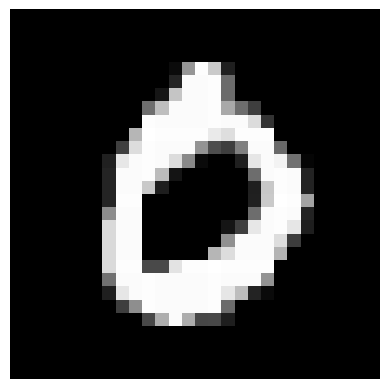

In [28]:
# Change the index in imshow to a # between 0 and 9999 to see a random image in the dataset
plt.imshow(test_images[3], cmap='gray')
plt.axis('off')

In [29]:
# Change this number to the one you inputted above to see what the network classifies it as!
network.classifyImage(test_images, 3)

0